<a href="https://colab.research.google.com/github/Dhamu785/AI-scratch/blob/main/Image_processing/Autoencoders/01_Image_enhancement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage.util import random_noise

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

## **Loading data**

In [2]:
(x_train_i, y_train_i), (x_test_i, y_test_i) = mnist.load_data()

len(x_train_i), len(y_train_i), len(x_test_i), len(y_test_i)

11490434/11490434 [==============================] - 0s 0us/step


(60000, 60000, 10000, 10000)

In [3]:
x_train_i = x_train_i.astype('float32') / 255.0
x_test_i = x_test_i.astype('float32') / 255.0

In [4]:
x_train_i.shape

(60000, 28, 28)

In [5]:
x_train_reshaped = np.reshape(x_train_i, (-1,28,28,1))
x_test_reshaped = np.reshape(x_test_i, (-1,28,28,1))

x_train_reshaped.shape, x_test_reshaped.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

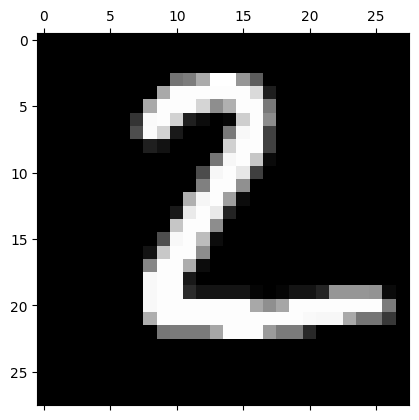

In [6]:
plt.matshow(x_test_reshaped[1], cmap='gray')
plt.show()

## **Adding noise**

In [7]:
noise_factor = 0.3
x_train_noisy_i = x_train_reshaped + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train_reshaped.shape)
x_test_noisy_i = x_test_reshaped + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test_reshaped.shape)

x_train_noisy_i = np.clip(x_train_noisy_i, 0., 1.)
x_test_noisy_i = np.clip(x_test_noisy_i, 0., 1.)


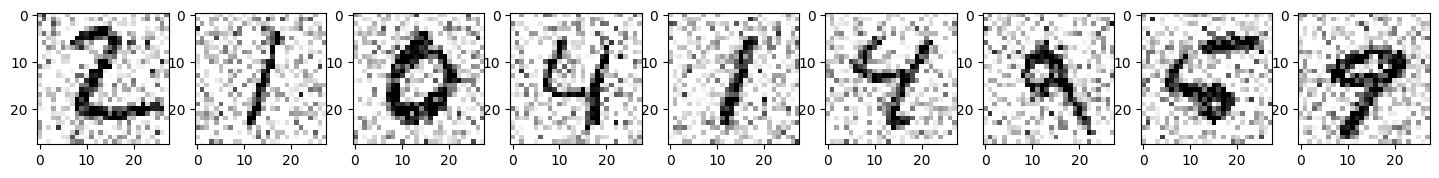

In [8]:
plt.figure(figsize=(20, 2))
for i in range(1,10):
    ax = plt.subplot(1, 10, i)
    plt.imshow(x_test_noisy_i[i].reshape(28, 28), cmap="binary")
plt.show()

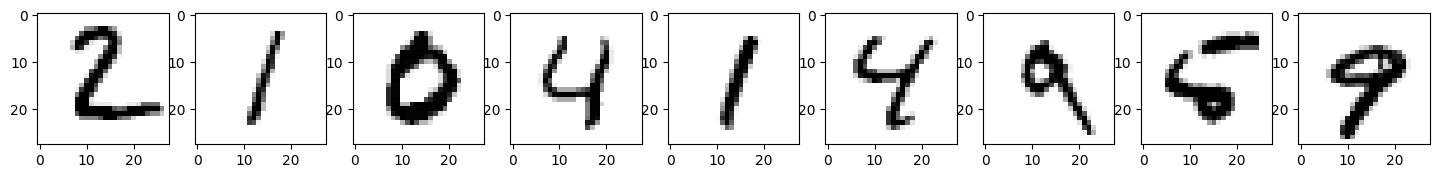

In [9]:
plt.figure(figsize=(20, 2))
for i in range(1,10):
    ax = plt.subplot(1, 10, i)
    plt.imshow(x_test_i[i].reshape(28, 28), cmap="binary")
plt.show()

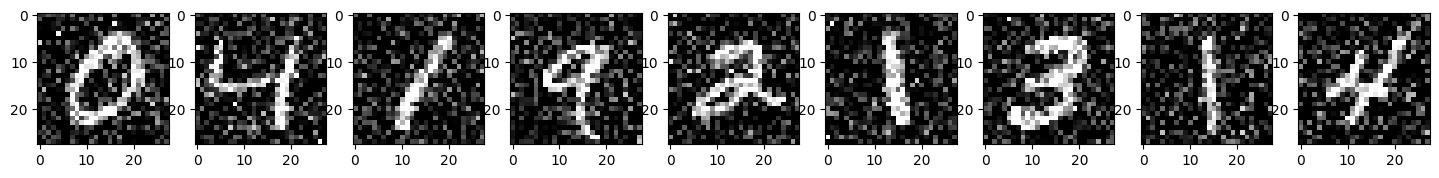

In [10]:
plt.figure(figsize=(20, 2))
for i in range(1,10):
    ax = plt.subplot(1, 10, i)
    plt.imshow(x_train_noisy_i[i].reshape(28, 28), cmap="gray")
plt.show()

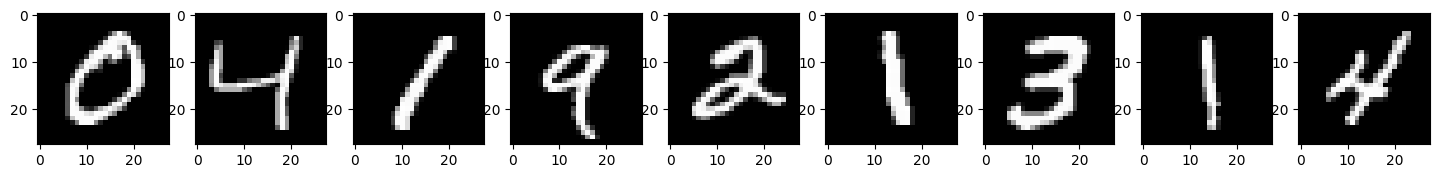

In [11]:
plt.figure(figsize=(20, 2))
for i in range(1,10):
    ax = plt.subplot(1, 10, i)
    plt.imshow(x_train_i[i].reshape(28, 28), cmap="gray")
plt.show()

#### **How the noise will work**

In [12]:
np.random.normal(loc=0.0, scale=1.0, size=x_train_reshaped.shape).shape

(60000, 28, 28, 1)

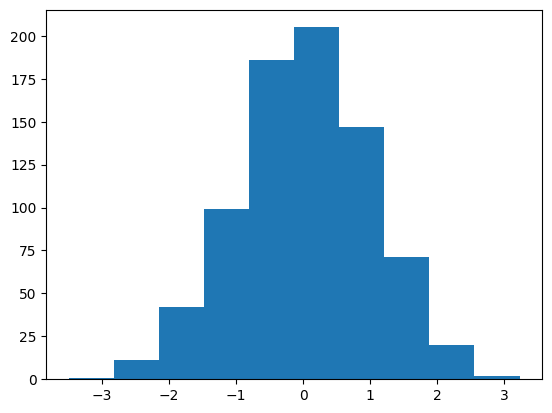

In [13]:
plt.hist(np.random.normal(loc=0.0, scale=1.0, size=x_train_reshaped.shape)[5].reshape(-1))
plt.show()

In [14]:
x_train_reshaped.shape, x_train_noisy_i.shape

((60000, 28, 28, 1), (60000, 28, 28, 1))

In [15]:
x_train_noisy_i.min(), x_train_noisy_i.max()

(0.0, 1.0)

## **Build model**
### **Size of image after applying filter**
**Formula**
- Size of image = ((I-F+2P)/S) + 1
- Where,
    - I = Image size
    - F = Filter size
    - P = Padding
    - S = Strides


In [18]:
model = Sequential([
    layers.Conv2D(32,(3,3), activation='relu', padding='same', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2), padding='same'),
    layers.Conv2D(8, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2), padding='same'),
    layers.Conv2D(8, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2), padding='same'),

    layers.Conv2D(8, (3,3), activation='relu', padding='same'),
    layers.UpSampling2D((2,2)),
    layers.Conv2D(8, (3,3), activation='relu', padding='same'),
    layers.UpSampling2D((2,2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.UpSampling2D((2,2)),

    layers.Conv2D(1, (3, 3), activation='relu', padding='same')
])

model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='mean_squared_error',
              metrics=['accuracy'])

In [19]:
model.fit(x_train_noisy_i, x_train_reshaped, epochs=10, batch_size=256, shuffle=True,
          validation_data=(x_test_noisy_i, x_test_reshaped))

Epoch 1/10
235/235 [==============================] - 9s 21ms/step - loss: 0.0504 - accuracy: 0.7994 - val_loss: 0.0370 - val_accuracy: 0.7975
Epoch 2/10
235/235 [==============================] - 7s 32ms/step - loss: 0.0332 - accuracy: 0.8028 - val_loss: 0.0296 - val_accuracy: 0.8036
Epoch 3/10
235/235 [==============================] - 5s 23ms/step - loss: 0.0282 - accuracy: 0.8052 - val_loss: 0.0264 - val_accuracy: 0.8060
Epoch 4/10
235/235 [==============================] - 4s 16ms/step - loss: 0.0259 - accuracy: 0.8063 - val_loss: 0.0247 - val_accuracy: 0.8069
Epoch 5/10
235/235 [==============================] - 6s 24ms/step - loss: 0.0243 - accuracy: 0.8072 - val_loss: 0.0237 - val_accuracy: 0.8084
Epoch 6/10
235/235 [==============================] - 3s 15ms/step - loss: 0.0231 - accuracy: 0.8078 - val_loss: 0.0223 - val_accuracy: 0.8061
Epoch 7/10
235/235 [==============================] - 6s 26ms/step - loss: 0.0221 - accuracy: 0.8083 - val_loss: 0.0214 - val_accuracy: 0.8071

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 8)         2312      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 7, 7, 8)           0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 7, 7, 8)           584       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 4, 4, 8)          

In [21]:
res_1 = model.predict(x_test_noisy_i)

313/313 [==============================] - 2s 6ms/step


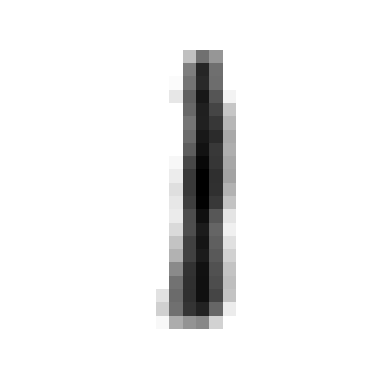

In [26]:
plt.matshow(res_1[14], cmap='binary')
plt.axis('off')
plt.show()

In [23]:
x_test_noisy_i[0][tf.newaxis].shape

(1, 28, 28, 1)

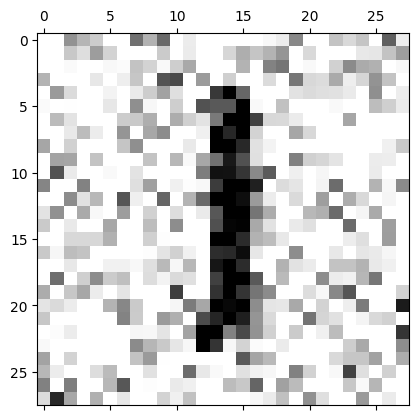

In [25]:
plt.matshow(x_test_noisy_i[14].reshape(28,28), cmap='binary')
plt.show()

1/1 [==============================] - 0s 93ms/step


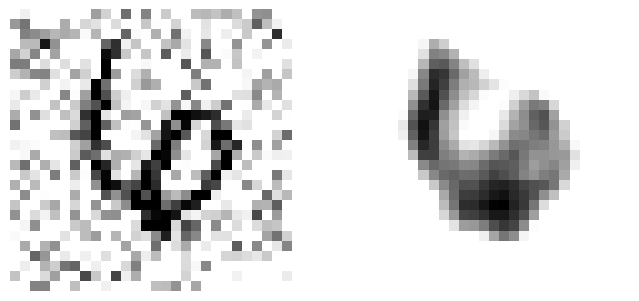

In [28]:
res2 = model.predict(x_test_noisy_i[22][tf.newaxis])

plt.figure(figsize=(8, 4))
ax = plt.subplot(1,2,1)
plt.imshow(x_test_noisy_i[22].reshape(28,28), cmap='binary')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(res2.reshape(28,28), cmap='binary')
plt.axis('off')
plt.show()

## **Model-2**

In [29]:
model_2 = tf.keras.models.Sequential([
    layers.Conv2D(32,(3,3), activation='relu', padding='same', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2), padding='same'),
    layers.Conv2D(8, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2), padding='same'),
    layers.Conv2D(8, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2), padding='same'),

    layers.Conv2D(8, (3,3), activation='relu', padding='same'),
    layers.UpSampling2D((2,2)),
    layers.Conv2D(8, (3,3), activation='relu', padding='same'),
    layers.UpSampling2D((2,2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.UpSampling2D((2,2)),

    layers.Conv2D(1, (3, 3), activation='relu', padding='same')
])

model_2.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='mean_squared_error',
              metrics=['accuracy'])

In [30]:
model_2.fit(x_train_noisy_i, x_train_reshaped, epochs=50, batch_size=256, shuffle=True,
          validation_data=(x_test_noisy_i, x_test_reshaped))

Epoch 1/50
235/235 [==============================] - 10s 32ms/step - loss: 0.0469 - accuracy: 0.8000 - val_loss: 0.0333 - val_accuracy: 0.8058
Epoch 2/50
235/235 [==============================] - 4s 16ms/step - loss: 0.0294 - accuracy: 0.8048 - val_loss: 0.0265 - val_accuracy: 0.8064
Epoch 3/50
235/235 [==============================] - 4s 17ms/step - loss: 0.0253 - accuracy: 0.8070 - val_loss: 0.0235 - val_accuracy: 0.8065
Epoch 4/50
235/235 [==============================] - 4s 17ms/step - loss: 0.0230 - accuracy: 0.8081 - val_loss: 0.0217 - val_accuracy: 0.8080
Epoch 5/50
235/235 [==============================] - 5s 20ms/step - loss: 0.0216 - accuracy: 0.8088 - val_loss: 0.0208 - val_accuracy: 0.8072
Epoch 6/50
235/235 [==============================] - 4s 18ms/step - loss: 0.0205 - accuracy: 0.8093 - val_loss: 0.0198 - val_accuracy: 0.8081
Epoch 7/50
235/235 [==============================] - 3s 14ms/step - loss: 0.0198 - accuracy: 0.8096 - val_loss: 0.0192 - val_accuracy: 0.808

## **Predictions**

In [38]:
res_2 = model_2.predict(x_test_noisy_i)

313/313 [==============================] - 1s 3ms/step


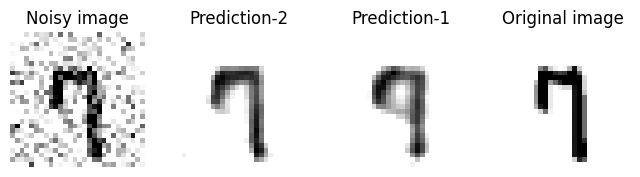

In [49]:
plt.figure(figsize=(8,5))
plt.subplot(1,4,1)
plt.imshow(x_test_noisy_i[80], cmap='binary')
plt.title("Noisy image")
plt.axis('off')

plt.subplot(1,4,2)
plt.imshow(res_2[80].reshape(28,28), cmap='binary')
plt.title("Prediction-2")
plt.axis('off')

plt.subplot(1,4,3)
plt.imshow(res_1[80].reshape(28,28), cmap='binary')
plt.title("Prediction-1")
plt.axis('off')

plt.subplot(1,4,4)
plt.imshow(x_test_reshaped[80], cmap='binary')
plt.title("Original image")
plt.axis('off')


plt.show()

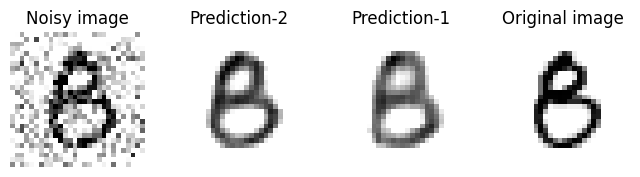

In [50]:
plt.figure(figsize=(8,5))
plt.subplot(1,4,1)
plt.imshow(x_test_noisy_i[800], cmap='binary')
plt.title("Noisy image")
plt.axis('off')

plt.subplot(1,4,2)
plt.imshow(res_2[800].reshape(28,28), cmap='binary')
plt.title("Prediction-2")
plt.axis('off')

plt.subplot(1,4,3)
plt.imshow(res_1[800].reshape(28,28), cmap='binary')
plt.title("Prediction-1")
plt.axis('off')

plt.subplot(1,4,4)
plt.imshow(x_test_reshaped[800], cmap='binary')
plt.title("Original image")
plt.axis('off')


plt.show()

In [45]:
model.evaluate(x_test_noisy_i, x_test_reshaped)

313/313 [==============================] - 2s 6ms/step - loss: 0.0196 - accuracy: 0.8086


[0.01959320157766342, 0.8085597157478333]

In [46]:
model_2.evaluate(x_test_noisy_i, x_test_reshaped)

313/313 [==============================] - 2s 6ms/step - loss: 0.0139 - accuracy: 0.8116


[0.013900741934776306, 0.81157386302948]